## Analyse en composantes principales (ACP)👨🏼‍🏫

L'analyse en composantes principales est une méthode de réduction de la dimensionnalité qui est souvent utilisée pour réduire la dimensionnalité de grands ensembles de données. L'idée de l'ACP est simple : réduire le nombre de variables d'un ensemble de données, tout en préservant autant d'informations que possible. L'application de cette méthode présente plusieurs avantages

Nous pouvons classer les observations en fonction de plusieurs variables surmonter la multi-collinéarité visualisation des données (biplot)

Cette méthode est basée sur les étapes suivantes :

Normaliser l'intervalle des variables initiales continues
Calculer la matrice de covariance pour identifier les corrélations
Calcul des vecteurs propres et des valeurs propres de la matrice de covariance pour identifier les composantes principales.
Créer un vecteur de caractéristiques pour décider des composantes principales à conserver
Refondre les données selon les axes des composantes principales

Nous allons appliquer l'analyse en composantes principales à l'ensemble de données du Wisconsin sur le cancer du sein (original). L'ensemble de données contient 699 observations réelles tenant compte de 9 variables indépendantes qui nous permettent de classer la variable dépendante comme étant maligne ou bénigne. Une brève description de la terminologie médicale peut être consultée dans ce carnet.

Import des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

Import du dataset

In [2]:
df= pd.read_csv('breast_cancer.csv') #read the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [4]:
df.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Nous remplacerons la valeur 2 par 0 et la valeur 4 par 1 dans la colonne classe. La valeur 1 indiquera un cancer malin et la valeur 0 un cancer bénin.

In [5]:
df=df.replace({'Class':{4:1, 2:0}})

In [6]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


Déclarer le vecteur de caractéristiques et la variable cible.

In [7]:
target= df['Class'] #target variable
df= df.drop(['Class'], axis=1)#feature vector

In [8]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


Normaliser l'intervalle des variables initiales continues.

- L'objectif de cette étape est de normaliser l'étendue des variables continues initiales afin que chacune d'entre elles contribue de manière égale à l'analyse.

In [9]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

Sélectionnez le nombre de composantes pour l'ACP.

Text(0, 0.5, 'Cumulative explained variance')

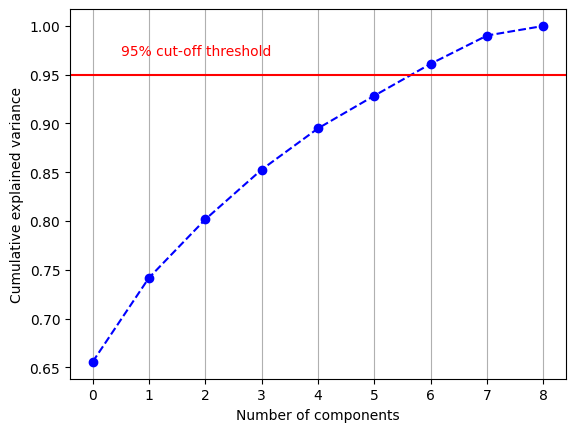

In [10]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.grid(axis='x')
plt.text(0.5, 0.97,'95% cut-off threshold', color = 'red')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

On constate que 95% de la variance est observée par 6 composantes.

Scree plot et Variance expliquée.
- Un scree plot montre la variation que chaque composante principale des données capture et nous permet de sélectionner les composantes principales à conserver dans l'ensemble des données. Si les deux ou trois premières composantes principales ont capté la plupart des informations, nous pouvons ignorer les autres sans manquer quoi que ce soit d'important. L'axe des ordonnées est représenté par les valeurs propres, qui indiquent essentiellement la quantité de variation.

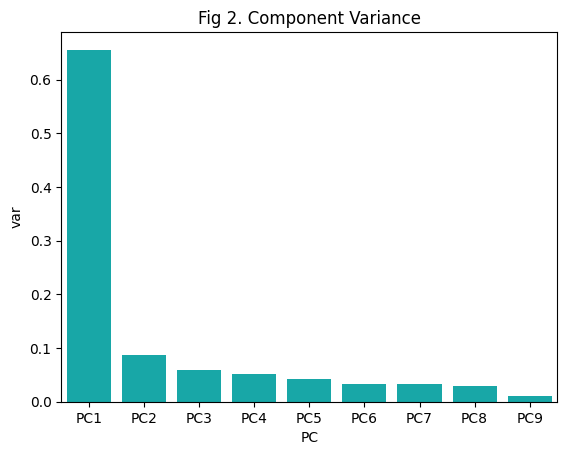

In [11]:
import seaborn as sn
dfScree = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})
sn.barplot(x='PC',y="var",data=dfScree, color="c").set_title('Fig 2. Component Variance');


Calculer les corrélations entre les données originales et chaque composante principale.
- Dans notre analyse, nous ne conserverons que les deux premières composantes qui capturent environ 75% de la variance.

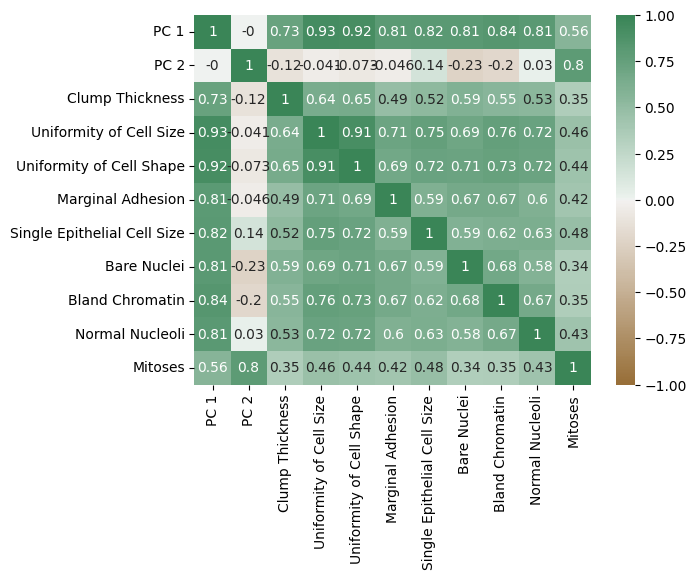

In [12]:
pca = PCA(n_components=2)
PC_scores = pd.DataFrame(pca.fit_transform(df_scaled),
               columns = ['PC 1', 'PC 2'])
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled = df_scaled.round(2)
df_corr = pd.concat([PC_scores,df_scaled], axis=1)
matrix_corr=round(df_corr.corr(),3)
heatmap = sns.heatmap(
matrix_corr,
vmin=-1, vmax=1,annot=True, center=0,
cmap=sns.diverging_palette(50, 500, n=500),

)
plt.show()

- ACP 1- La première composante principale est fortement corrélée avec huit des variables originales.
- ACP 2- La deuxième composante principale n'est fortement corrélée qu'avec les Mitoses.

Analyse bivariée

Terminologie : Les résultats d'une ACP sont généralement discutés en termes de scores de composantes, parfois appelés scores de facteurs (les valeurs de variables transformées correspondant à un point de données particulier), et de charges (le poids par lequel chaque variable originale normalisée doit être multipliée pour obtenir le score de la composante).

L'analyse par biplot est une méthode graphique exploratoire utilisée en statistique avec un graphique bidimensionnel qui représente un ensemble de données multidimensionnelles.

Représentation des degrés d'angle entre deux variables :

- 90 degrés, il n'y a pas de corrélation entre deux variables
- moins de 90 degrés, il y a une corrélation positive entre deux variables
- plus de 90 degrés, il y a une corrélation négative entre deux variables.

Représentation de la longueur de la ligne du vecteur :

- la longueur de la ligne vectorielle représente le niveau de variance de la variable
- plus la ligne vectorielle est longue, plus la variance est grande
- plus la ligne est courte, moins la variance est importante.

Représentation de la distance observée et de la variable :

- plus la distance d'observation et la direction de la variable sont faibles, plus la valeur de la variable pour cette observation est élevée
- plus la distance entre l'observation et la direction de la variable est grande, plus la valeur de la variable pour cette observation est faible.

In [ ]:
PC1 = pca.fit_transform(df_scaled)[:,0]
PC2 = pca.fit_transform(df_scaled)[:,1]
ldngs = pca.components_#loadings
pca.components_

In [ ]:
scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']

In [ ]:
target_groups = np.digitize(target, 
                            np.quantile(target, 
                                        [1/3, 2/3]))

In [ ]:
fig, ax = plt.subplots(figsize=(14, 9))
 
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i], 
             head_width=0.03, 
             head_length=0.03)
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize = 14,color="red")
    
scatter = ax.scatter(PC1 * scalePC1, 
                     PC2 * scalePC2, 
                     c=target_groups, 
                     cmap='viridis')
 
ax.set_xlabel('PC1', fontsize=15,color="blue")
ax.set_ylabel('PC2', fontsize=15,color="blue")
for i, label in enumerate(PC_scores.index):
    ax.text(PC1[i] * scalePC1, 
            PC2[i] * scalePC2, str(label), 
            fontsize=10)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", 
                    title="Groups")
ax.add_artist(legend1)

# Observations 

- Les axes gauche et inférieur sont ceux de l'ACP. Il montre les scores ACP des échantillons (points).
- Les axes supérieur et droit correspondent au diagramme de charge. Il montre l'influence de chaque caractéristique (vecteur) sur les composantes principales.

# Interprétation de l'analyse bivariée

- La longueur du vecteur de toutes les variables est relativement la même, seule la variable Mitoses a la ligne la plus longue.
- La variable "Mitoses" présente la plus grande variance de valeurs par rapport aux autres variables.
- Les variables "Uniformité de la forme des cellules" et "Taille d'une seule cellule épithéliale" ont une forte corrélation positive parce qu'elles ont un très faible écart entre deux lignes. Il en va de même pour les variables "Noyaux nus" et "Chromatine fade".
- Les variables "Noyaux nus" et "Mitose" ont une faible corrélation positive car le degré entre deux lignes est proche de 90 %.
- Les variables "Uniformité de la forme des cellules" et "Taille d'une seule cellule épithéliale" ont des charges positives importantes sur la composante 1.
- Les mitoses ont des charges positives importantes sur la composante 2.